#### import

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### read & load dataset

In [27]:
marketing = pd.read_csv(
    filepath_or_buffer='marketing.csv',
    parse_dates=['date_served', 'date_subscribed', 'date_canceled']
)

In [28]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [29]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [66]:
def conversion_rate(dataframe, column_names):
    """
    Doc String
    """
    # conversion rate = total_converted / total_users
    
    total_converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    total_users = dataframe.groupby(column_names)['user_id'].nunique()
    
    conversion_rate = total_converted / total_users
    conversion_rate = round(conversion_rate*100, 2)
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

In [68]:
conv_rate = conversion_rate(marketing, ['date_served', 'subscribing_channel'])
conv_rate.unstack(level=1)

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,50.00,61.54,48.48,38.10,75.00
2018-01-02,33.33,25.00,100.00,18.60,18.18
2018-01-03,0.00,23.81,100.00,28.95,42.86
2018-01-04,33.33,69.23,53.57,50.00,66.67
2018-01-05,9.09,70.00,100.00,64.71,33.33
2018-01-06,42.86,70.00,100.00,54.55,28.57
2018-01-07,66.67,38.46,100.00,71.43,60.00
2018-01-08,33.33,69.23,100.00,47.06,50.00
2018-01-09,33.33,58.33,100.00,56.25,100.00


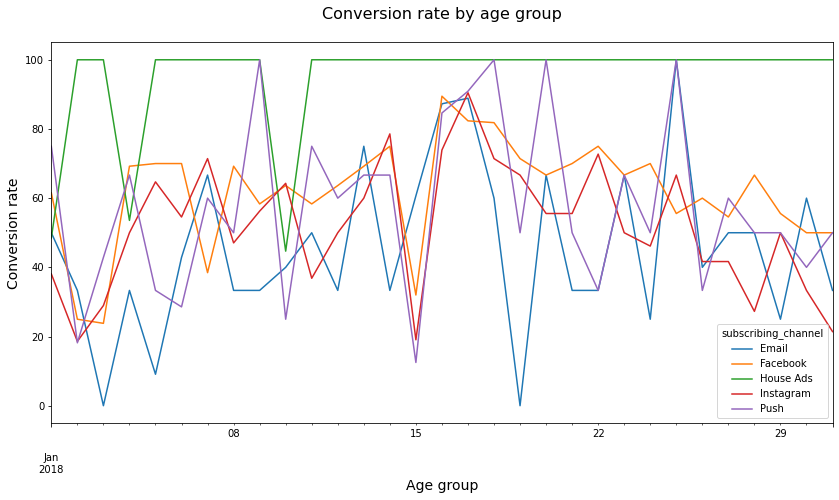

In [53]:
conversion_rate(marketing, ['date_served', 'subscribing_channel']).plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [63]:
def retention_rate(dataframe, column_names):
    """
    Doc String
    """
    # retention rate = total_retained / total_subscribed
    
    total_retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    total_converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    retention_rate = (total_retained / total_converted)
    
    # Fill missing values with 0
    retention_rate = retention_rate.fillna(0)
    
    return retention_rate

In [65]:
reten_rate = retention_rate(marketing, ['date_served', 'subscribing_channel'])
reten_rate.unstack(level=1)

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,2.000000,1.375000,1.250000,2.125000,1.333333
2018-01-02,2.250000,3.666667,0.588235,4.375000,5.000000
2018-01-03,0.000000,3.000000,0.647059,2.727273,2.000000
2018-01-04,2.000000,1.000000,0.733333,1.250000,1.000000
2018-01-05,8.000000,0.857143,0.500000,0.909091,2.000000
2018-01-06,2.000000,0.857143,0.941176,1.166667,2.000000
2018-01-07,1.000000,2.000000,0.526316,1.000000,1.333333
2018-01-08,1.000000,1.111111,0.500000,1.375000,1.500000
2018-01-09,2.000000,0.857143,0.850000,1.333333,0.500000


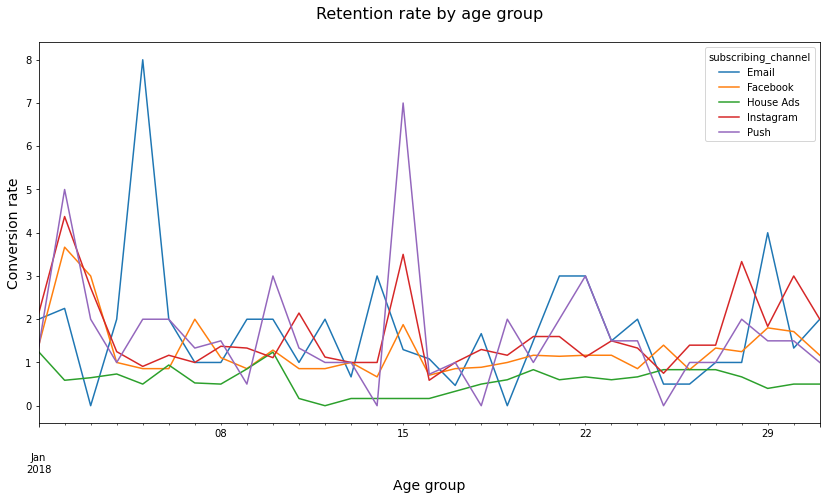

In [55]:
retention_rate(marketing, ['date_served', 'subscribing_channel']).plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.title('Retention rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

# Identify Inconsistencies

- Now we have 2 useful methods for compute conversion and retention rate

### Days of week trends

In [58]:
marketing['DoW'] = marketing['date_served'].dt.dayofweek

Text(0, 0.5, 'Retention rate')

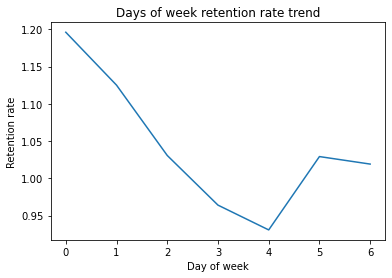

In [75]:
Dow_retention = retention_rate(marketing, ['DoW'])

Dow_retention.plot()
plt.title("Days of week retention rate trend")
plt.xlabel("Day of week")
plt.ylabel("Retention rate")

Text(0, 0.5, 'Retention rate')

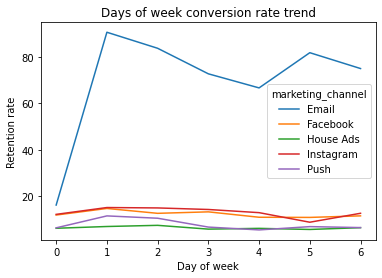

In [85]:
Dow_conversion = conversion_rate(marketing, ['DoW', 'marketing_channel'])
Dow_conversion = pd.DataFrame(Dow_conversion.unstack(level=1))
Dow_conversion.plot()
plt.title("Days of week conversion rate trend")
plt.xlabel("Day of week")
plt.ylabel("Retention rate")

### Marketing Channel

In [80]:
conv_rate = conversion_rate(marketing, ['date_served', 'marketing_channel'])
conv_rate = conv_rate.unstack(level=1)

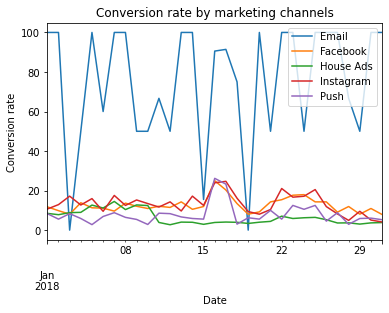

In [83]:
conv_rate.plot()
plt.title("Conversion rate by marketing channels")
plt.xlabel("Date")
plt.ylabel("Conversion rate")
plt.legend(loc='upper right')

### Marketing channels & Language

In [91]:
lang_chann_conv = conversion_rate(marketing, ['marketing_channel', 'language_displayed'])

In [92]:
lang_chann_conv = pd.DataFrame(lang_chann_conv.unstack(level=1))

<AxesSubplot:xlabel='marketing_channel'>

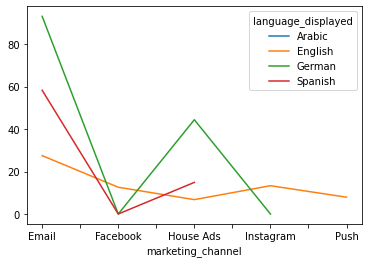

In [93]:
lang_chann_conv.plot()

In [94]:
conv_lang_channel = conversion_rate(marketing, ['date_served', 'language_displayed'])

In [96]:
conv_lang_channel = pd.DataFrame(conv_lang_channel.unstack(level=1))

<AxesSubplot:xlabel='date_served'>

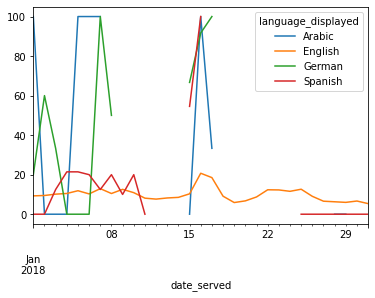

In [98]:
conv_lang_channel.plot()